In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
#Read the csv file
df = pd.read_csv("AB_NYC_2019.csv")
print(df)

             id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_grou

In [5]:
#Display the first few rows
print(df.head())

     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  20

In [7]:
#Dislay of the basic information about the dataset
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [9]:
# Check for missing values
print(df.isnull().sum())

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [19]:
# Check for missing values and fill them
for column in df.columns:
    if df[column].isnull().sum() > 0:
        if df[column].dtype == 'object':
            df[column].fillna('Unknown', inplace=True)
        elif df[column].dtype in ['int64', 'float64']:
            df[column].fillna(0, inplace=True)

# Display the updated DataFrame
print(df)

             id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_grou

In [21]:
#Removing Duplicates
data_cleaned = df.drop_duplicates()

In [23]:
#Removing Outliers
# Filter out listings where 'price' is greater than 1000 and 'minimum_nights' is greater than 365
data_cleaned = data_cleaned[(data_cleaned['price'] <= 1000) & (data_cleaned['minimum_nights'] <= 365)]

In [25]:
# Save the cleaned dataset
data_cleaned.to_csv('cleaned_data.csv', index=False)

In [27]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48642 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48642 non-null  int64  
 1   name                            48642 non-null  object 
 2   host_id                         48642 non-null  int64  
 3   host_name                       48642 non-null  object 
 4   neighbourhood_group             48642 non-null  object 
 5   neighbourhood                   48642 non-null  object 
 6   latitude                        48642 non-null  float64
 7   longitude                       48642 non-null  float64
 8   room_type                       48642 non-null  object 
 9   price                           48642 non-null  int64  
 10  minimum_nights                  48642 non-null  int64  
 11  number_of_reviews               48642 non-null  int64  
 12  last_review                     48642

In [29]:
#Mean, Median, Mode for key numerical columns
mean_values = data_cleaned[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month']].mean()
median_values = data_cleaned[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month']].median()
mode_values = data_cleaned[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month']].mode().iloc[0]

#Standard Deviation and Variance
std_values = data_cleaned[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month']].std()
var_values = data_cleaned[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month']].var()

#Skewness and Kurtosis
skewness_values = data_cleaned[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month']].skew()
kurtosis_values = data_cleaned[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month']].kurt()

In [31]:
# Display results
print("Mean:\n", mean_values)
print("\nMedian:\n", median_values)
print("\nMode:\n", mode_values)
print("\nStandard Deviation:\n", std_values)
print("\nVariance:\n", var_values)
print("\nSkewness:\n", skewness_values)
print("\nKurtosis:\n", kurtosis_values)

Mean:
 price                141.280910
minimum_nights         6.783068
number_of_reviews     23.362506
reviews_per_month      1.094943
dtype: float64

Median:
 price                105.00
minimum_nights         3.00
number_of_reviews      5.00
reviews_per_month      0.38
dtype: float64

Mode:
 price                100.0
minimum_nights         1.0
number_of_reviews      0.0
reviews_per_month      0.0
Name: 0, dtype: float64

Standard Deviation:
 price                116.743586
minimum_nights        16.122027
number_of_reviews     44.635504
reviews_per_month      1.599620
dtype: float64

Variance:
 price                13629.064897
minimum_nights         259.919758
number_of_reviews     1992.328179
reviews_per_month        2.558785
dtype: float64

Skewness:
 price                 2.943074
minimum_nights       11.631950
number_of_reviews     3.682850
reviews_per_month     3.296045
dtype: float64

Kurtosis:
 price                 12.941701
minimum_nights       209.573132
number_of_reviews 

In [41]:
#Display the summary statistics
summary_stats = df.describe()
print(summary_stats)

                 id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       48895.000000   
mean         7.029962          23.274466           1.090910   
std         20.510550          44.550582           1.597283   
min          1.000000           0.00

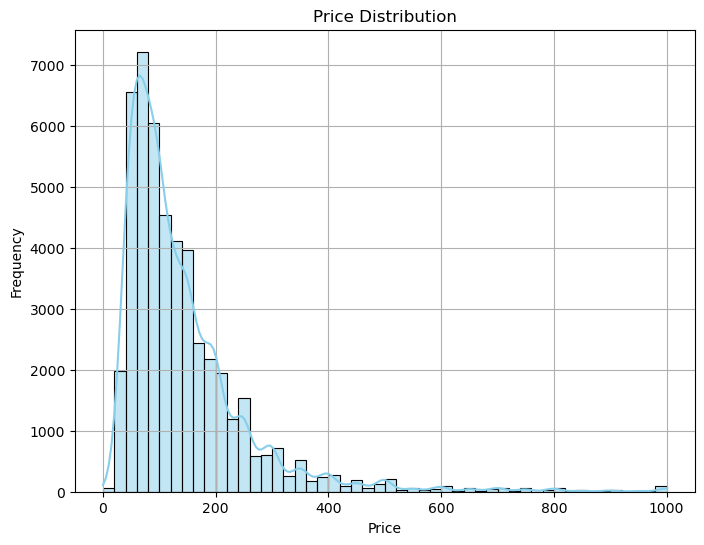

In [43]:
#Distribution of Price
plt.figure(figsize=(8, 6))
sns.histplot(data_cleaned['price'], bins=50, kde=True, color='skyblue')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

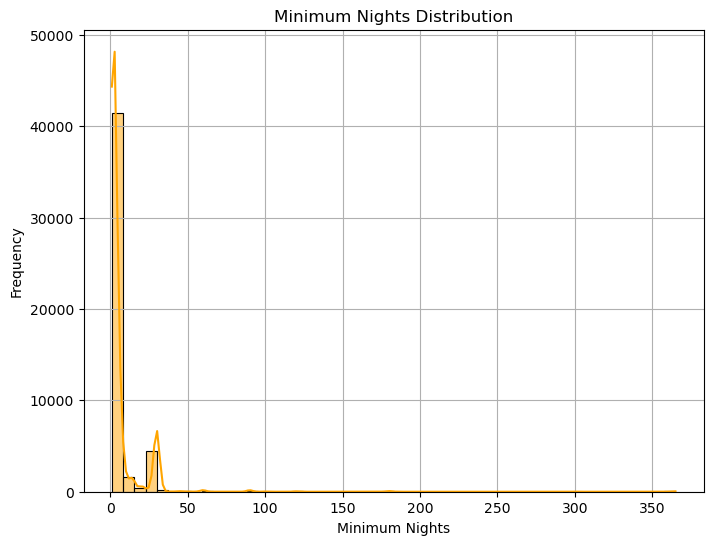

In [45]:
#Distribution of Minimum Nights
plt.figure(figsize=(8, 6))
sns.histplot(data_cleaned['minimum_nights'], bins=50, kde=True, color='orange')
plt.title('Minimum Nights Distribution')
plt.xlabel('Minimum Nights')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

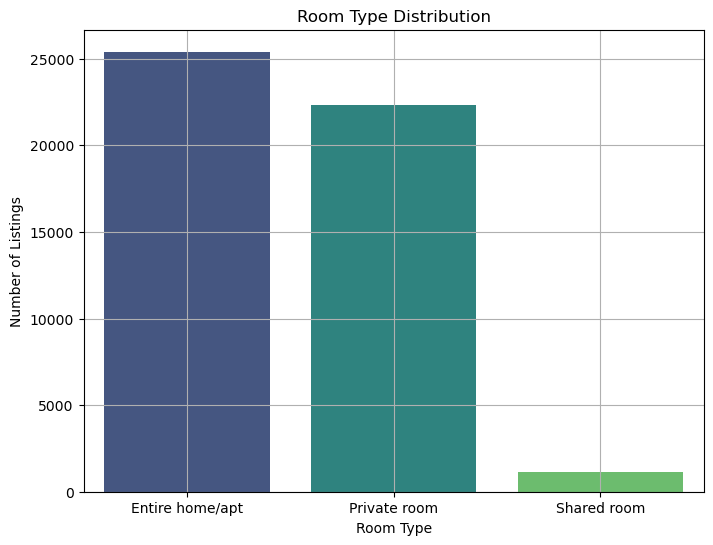

In [47]:
#Room Type Analysis
# Make sure you have room_type_counts defined correctly
room_type_counts = df['room_type'].value_counts()
# Plot the bar chart for room type distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=room_type_counts.index, y=room_type_counts.values, hue=room_type_counts.index, palette='viridis', legend=False)
plt.title('Room Type Distribution')
plt.xlabel('Room Type')
plt.ylabel('Number of Listings')
plt.grid(True)
plt.show()

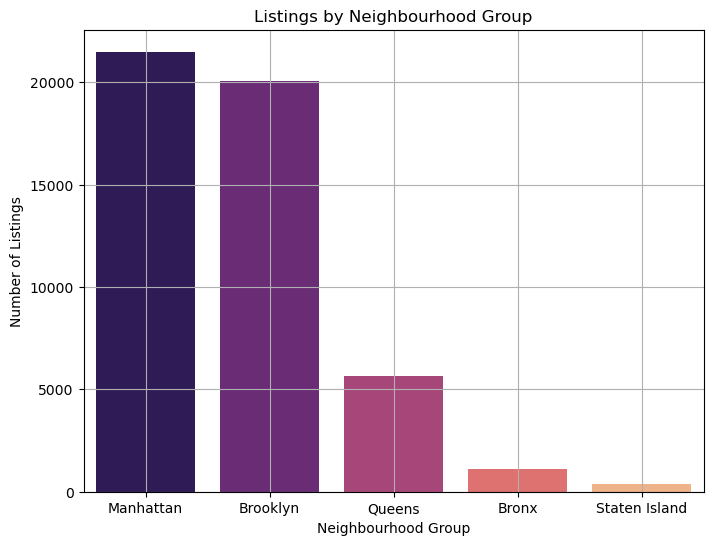

In [55]:
# Assuming data_cleaned is your DataFrame
neighbourhood_group_counts = data_cleaned['neighbourhood_group'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=neighbourhood_group_counts.index, y=neighbourhood_group_counts.values, hue=neighbourhood_group_counts.index, palette='magma', legend=False)
plt.title('Listings by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Listings')
plt.grid(True)
plt.show()

In [57]:
# Check if 'data_cleaned' is defined and contains only numeric data
if 'data_cleaned' in locals():
    print("data_cleaned is defined.")
    # Check for numeric columns
    numeric_data = data_cleaned.select_dtypes(include=['number'])
    print("Numeric columns:")
    print(numeric_data.columns)
else:
    print("data_cleaned is not defined.")

data_cleaned is defined.
Numeric columns:
Index(['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')


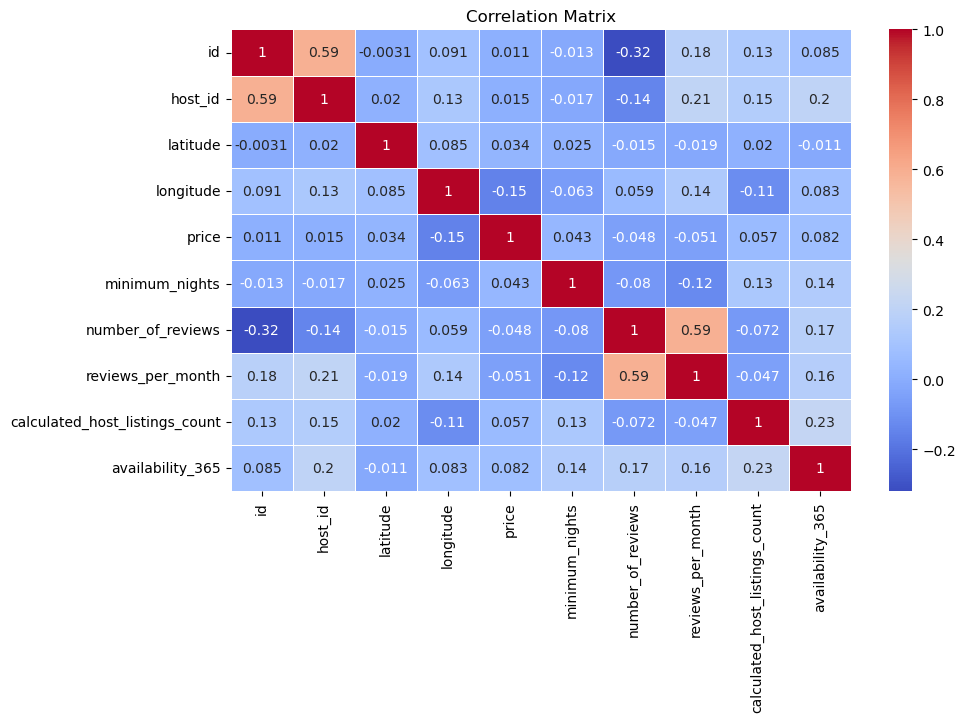

In [59]:
# Select only numeric columns from the existing dataframe 'df'
numeric_data = df.select_dtypes(include=['number'])

# Plot the correlation matrix
plt.figure(figsize=(10, 6))
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
#Insights from the EDA of the Airbnb NYC Dataset:
#1. Price Analysis: Most listings are priced below $300, indicating affordability for short-term travelers, although luxury properties priced up to 
#$1,000 skew the average price. The mean price exceeds the median, suggesting high-priced listings influence the average.

#2.Room Type Preferences: Entire homes/apartments make up over 50% of listings, reflecting a preference for full rentals. Private rooms are the second 
#most popular, appealing to budget-conscious travelers, while shared rooms show low demand.

#3. Minimum Nights Stay:Most listings require a minimum stay of 1-10 nights, aligning with tourist patterns, though some outlier listings for over 
#365 days target long-term residents.

#4. Neighborhood Group Analysis: Manhattan has the highest number of listings, affirming its status as a tourist hub, followed by Brooklyn. Other 
#boroughs like Queens, Bronx, and Staten Island have fewer listings and lower prices.

#5.Reviews Analysis: Listings with more reviews tend to be more popular, with higher turnover rates. Reviews per month indicate demand, with higher 
#frequency suggesting desirable locations or competitive pricing.

#6. Correlation Between Variables: Weak correlations exist between price, minimum nights, and reviews. A slight negative correlation between price and 
#reviews per month suggests higher-priced listings may be booked less frequently.

#7. Outlier Detection: Outliers in pricing and minimum nights require careful analysis, as they may represent luxury properties or special conditions 
#that could skew overall findings.

#8. Standardization and Data Cleaning: Missing values in reviews_per_month were addressed, duplicates removed, and data standardized for consistent 
#analysis.

In [ ]:
#Business Recommendations:
#Focus on Manhattan: Target premium listings in Manhattan to maximize profits, given its high demand and average price.
#Catering to Short-Term Stays: Optimize properties for short-term rentals to align with tourist needs.
#Potential in Brooklyn: Target mid-range to budget travelers in Brooklyn, capitalizing on its significant listings.
#Luxury Market Insight: Explore high-end properties or long-term rentals in Manhattan to attract affluent clients.
#Improve Popularity Through Reviews: Enhance customer service and encourage reviews to boost booking rates.
#Optimize Pricing Strategy: Consider competitive pricing based on qualitative factors like location and property type, as price correlates weakly with 
#other features.